In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate
import graphviz 

import sys
sys.path.append('/Users/krish/Desktop/DYNAMIC MODEL VEGETATION PROJECT/au_dyanamic_vegetation_project/STEP9_DATA_MODELLING_AND_EXPLORATION')

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from PreprocessData import * # import from custom transformers
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance
from skopt import BayesSearchCV
from sklearn.linear_model import LinearRegression

In [2]:
site_location_name = 'NSANAN0002'
site_merged = pd.read_csv(f'Input_DataSet_{site_location_name}.csv', parse_dates = ['time']).copy()
site_merged = site_merged.set_index('time')

In [3]:
site_merged

,Unnamed: 0,x,y,bs,pv,npv,ue,spatial_ref,pv_filter,npv_filter,...,VPD_14,VPD_30,tmax_lag,tmax_7,tmax_14,tmax_30,tmin_lag,tmin_7,tmin_14,tmin_30
time,,,,,,,,,,,,,,,,,,,,,
1987-09-02,1.00,226099.954128,6.646545e+06,0.706422,58.577982,39.559633,23.816514,28356.0,59.582800,37.713692,...,2.936094,5.162941,8.882812,80.652344,93.874023,198.660156,0.853516,33.492188,30.613281,65.271484
1987-09-18,2.50,226095.000000,6.646545e+06,3.247934,57.574380,37.644628,22.004132,28356.0,57.484859,38.938670,...,3.660753,7.053645,20.903320,105.708008,97.240234,208.695312,3.994141,-2.206055,19.028320,60.356445
1987-10-04,4.00,226095.000000,6.646545e+06,2.595041,57.685950,38.314050,21.966942,28356.0,56.307440,39.153713,...,7.773265,11.959174,19.090820,123.933594,157.581055,264.698242,7.795898,37.218750,36.477539,28.314453
1987-10-20,5.00,226095.000000,6.646545e+06,5.611570,59.115702,33.487603,22.818182,28356.0,55.817417,38.766409,...,8.149690,15.945353,13.331055,103.735352,160.157227,332.157227,7.316406,40.486328,49.732422,95.603516
1987-11-05,6.00,226095.000000,6.646545e+06,4.619835,57.264463,36.438017,22.537190,28356.0,55.813276,38.107261,...,6.189073,13.700848,25.823242,154.611328,148.677734,310.155273,16.317383,66.708984,58.732422,108.486328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-09,1194.00,226095.000000,6.646545e+06,3.619835,58.595041,35.785124,20.132231,28356.0,57.174503,31.393724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-25,1195.50,226095.000000,6.646545e+06,6.148760,58.086777,33.863636,20.479339,28356.0,56.893531,29.689091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-13,1196.25,226095.163043,6.646545e+06,15.639598,56.200997,26.502470,18.255974,28356.0,56.770383,28.480383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='time'>

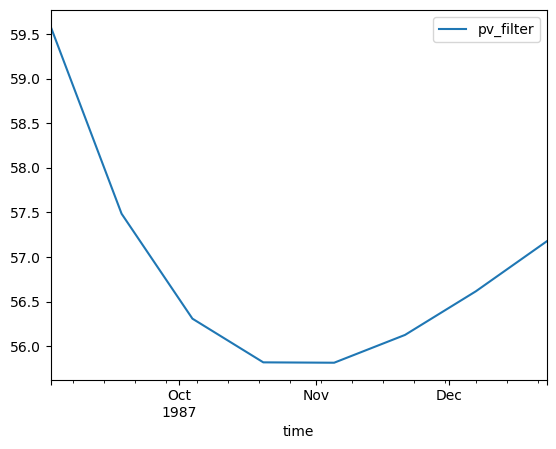

In [4]:
site_merged.loc[site_merged.year == 1987].plot(y = 'pv_filter')

<Axes: xlabel='time'>

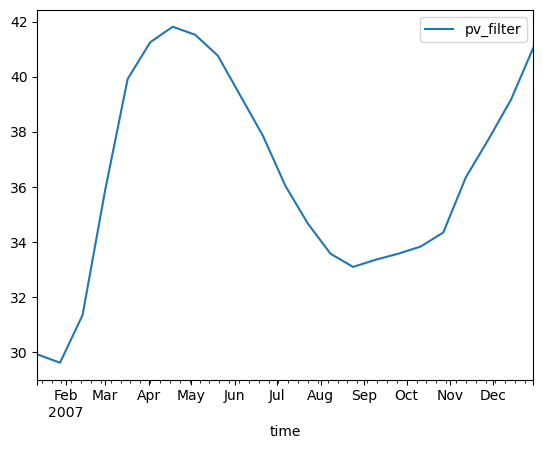

In [14]:
site_merged.loc[site_merged.year == 2007].plot(y = 'pv_filter')

<Axes: xlabel='dayofyear_cir', ylabel='pv_filter'>

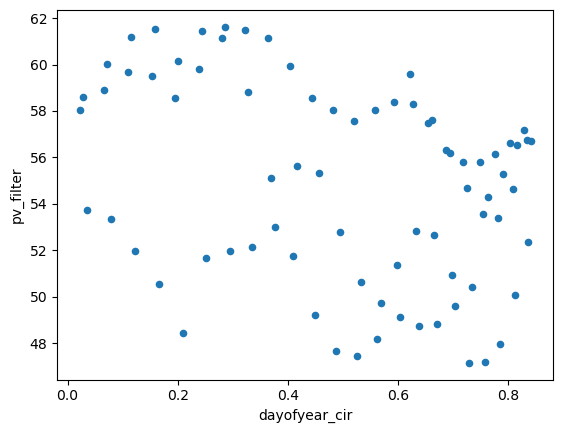

In [29]:
site_merged.loc[(site_merged.year <= 1990) & (site_merged.year >= 1987)].plot.scatter(y = 'pv_filter', x = 'dayofyear_cir')

In [ ]:
site_merged.loc[(site_merged.year < 2023) & (site_merged.year > 1987)].plot(y = 'pv_filter')

In [ ]:
site_merged.loc[site_merged.year == 2008].plot(y = 'pv_filter')